# Car Price Prediction with Machine Learning

## Introduction

This project focuses on using machine learning techniques to predict the selling price of used cars based on various attributes, including the car's brand, manufacturing year, current market price, mileage, fuel type, and more. By analyzing historical data and building predictive models, we aim to develop a tool that provides accurate car price estimates. This can assist car dealers, buyers, and financial institutions in making informed decisions and improving pricing strategies.


## Problem Statement

The objective of this project is to develop a machine learning model that accurately predicts the selling price of used cars based on several input features. 


In [197]:
# Import Libraries

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split                                    
from sklearn.preprocessing import LabelEncoder, StandardScaler                                 
from sklearn.linear_model import LinearRegression                                    
from sklearn.ensemble import RandomForestRegressor                                        
from sklearn.metrics import mean_squared_error, r2_score                                          

## Dataset Overview

The dataset used for this project includes various features related to used cars, which are essential for predicting their selling price. Here is a brief overview:

- **`Car_Name`**: Name or model of the car (categorical)
- **`Year`**: Year of manufacture (numerical)
- **`Selling_Price`**: Price at which the car was sold (target variable, numerical)
- **`Present_Price`**: Current market price of the car (numerical)
- **`Driven_kms`**: Total kilometers driven (numerical)
- **`Fuel_Type`**: Type of fuel used (categorical)
- **`Selling_type`**: Type of sale (categorical)
- **`Transmission`**: Type of transmission (categorical)
- **`Owner`**: Number of previous owners (numerical)


In [202]:
# Load the dataset

In [204]:
df = pd.read_csv('car data.csv')                                    
df.head()                                    

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data Preprocessing

In [207]:
# Check for missing values

In [209]:
print(df.isnull().sum())                                

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


### Feature Engineering
 It is the process of creating and refining features from raw data to improve the performance of a machine learning model.

In [212]:
# We create a new column 'Car_Age' based on the Year column. This will represent how old the car is.

In [214]:
df['Car_Age'] = 2024 - df['Year']                                            
df = df.drop('Year', axis=1)                                                           

### Encode Categorical Variables
 It is the process of converting non-numeric data into numeric values so that it can be used in machine learning models.

In [217]:
# We first initialize LabelEncoder and then convert categorical columns like Fuel_Type, Selling_type, and Transmission into numeric values.

In [219]:
le = LabelEncoder()                                                                        
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])                                  
df['Selling_type'] = le.fit_transform(df['Selling_type'])                        
df['Transmission'] = le.fit_transform(df['Transmission'])                       

df.head()                                                                                            

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,2,0,1,0,10
1,sx4,4.75,9.54,43000,1,0,1,0,11
2,ciaz,7.25,9.85,6900,2,0,1,0,7
3,wagon r,2.85,4.15,5200,2,0,1,0,13
4,swift,4.60,6.87,42450,1,0,1,0,10


### Scaling Numerical Variables
It adjusts their range so that they are on a similar scale, improving the performance and training stability of machine learning models.

In [222]:
# We scale the numerical columns to normalize them. Columns like Present_Price, Driven_kms, and Car_Age should be scaled for better
# model performance.

In [224]:
scaler = StandardScaler() 
numerical_cols = ['Present_Price', 'Driven_kms', 'Car_Age']                             

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])                           

## Exploratory Data Analysis (EDA)

In [227]:
# Selling Price Distribution

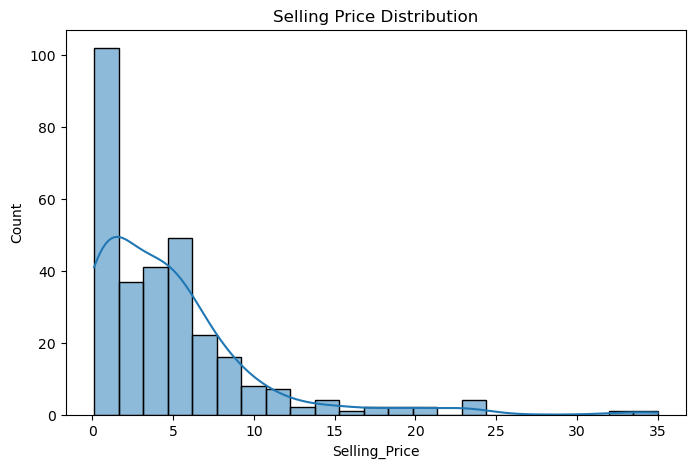

In [229]:
plt.figure(figsize=(8, 5))                                                
sns.histplot(df['Selling_Price'], kde=True)                                                    
plt.title('Selling Price Distribution')                                                    
plt.show()                                                            

In [231]:
# Correlation Matrix

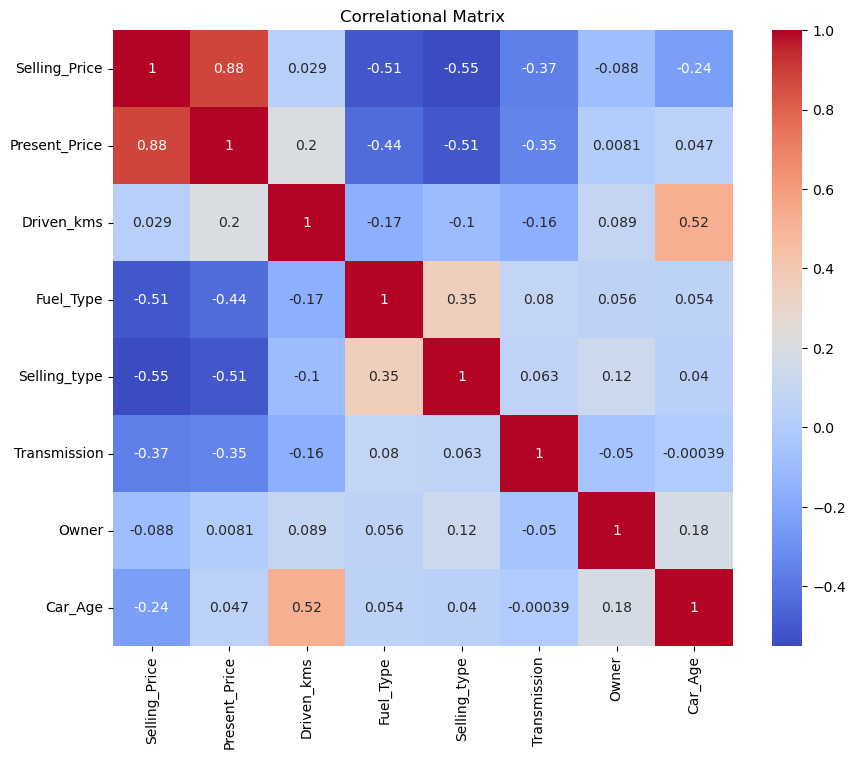

In [233]:
# Drop the 'Car_Name' column, since it's a string and not suitable for correlation
df = df.drop('Car_Name', axis=1)                                                                    

plt.figure(figsize=(10, 8))                                                
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')                                        
plt.title('Correlational Matrix')                                                
plt.show()                                                                

## Split the Data
Training is teaching the model with data, while testing checks how well the model performs with new, unseen data.

In [236]:
# We drop the Selling_Price from the features while splitting the data because it's the target variable we're trying to predict,
# not a feature used for prediction.

In [238]:
X = df.drop('Selling_Price', axis=1)                                                           
y = df['Selling_Price']                                                            

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)                        

## Model Training

In [241]:
# We now train two models: Linear Regression and Random Forest Regressor.

### Linear Regression Model
A Linear Regression model predicts outcomes by finding the best-fit line through the data points.

In [244]:
linear_model = LinearRegression()                                        
linear_model.fit(X_train, y_train)                                                

# Predictions
y_pred_linear = linear_model.predict(X_test)                                                                


### Random Forest Regressor
A Random Forest Regressor predicts values by combining the results from many decision trees to improve accuracy.
Decision trees predict outcomes by making a series of decisions based on the features of the data.

In [247]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)                                        
rf_model.fit(X_train, y_train)                                                            

# Predictions
y_pred_rf = rf_model.predict(X_test)                                     


## Model Evaluation
Mean Squared Error (MSE) measures how close predictions are to the actual values, and R² shows how well the model explains the data’s variability.
- **Mean Squared Error (MSE)**: Average of the squared differences between predicted and actual values.
- **R²**: The proportion of the data’s variance that the model explains.
- **Variance**: It measures how much the values in a dataset differ from the average value.

In [250]:
# We evaluate the models using Mean Squared Error (MSE) and R²

In [252]:
# Evaluate Linear Regression

In [254]:
mse_linear = mean_squared_error(y_test, y_pred_linear)                                                                
r2_linear = r2_score(y_test, y_pred_linear)                                        

print(f'Linear Regression MSE: {mse_linear}')                           
print(f'Linear Regression R²: {r2_linear}')                                                   


Linear Regression MSE: 3.5315798889686634
Linear Regression R²: 0.8466902419663815


In [256]:
# Evaluate Linear Regression

In [258]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R²: {r2_rf}')


Random Forest MSE: 0.8661225442622943
Random Forest R²: 0.9624006699938786


### Hyperparameter Tuning
 It is the process of adjusting the settings or parameters of a machine learning model to improve its performance.
 GridSearchCV is used to systematically test multiple combinations of hyperparameters to find the best model settings.

In [261]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)


{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


### Feature Importance
It measures how much each feature contributes to the predictions made by a model.

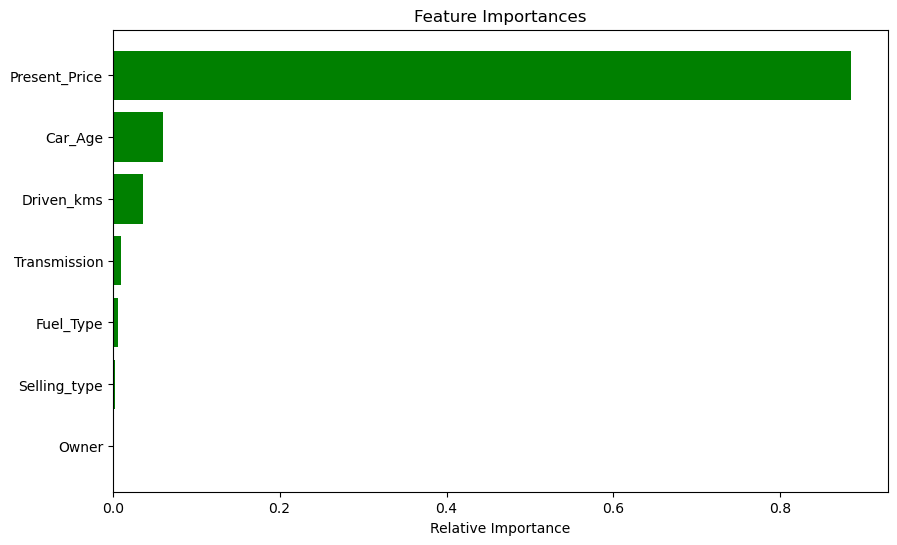

In [264]:
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [266]:
# New car data (raw) in numeric format (since encoding was already done)

In [268]:
new_car_data = {
    'Present_Price': 3.15,
    'Driven_kms': 500,
    'Fuel_Type': 3,  # Assuming 'Petrol' was encoded as 1
    'Selling_type': 0,  # Assuming 'Dealer' was encoded as 0
    'Transmission': 0,  # Assuming 'Manual' was encoded as 0
    'Owner': 0,
    'Car_Age':4  # Assuming the car was purchased in 2017
}

new_car_df = pd.DataFrame([new_car_data])

numerical_cols = ['Present_Price', 'Driven_kms', 'Car_Age']
new_car_df[numerical_cols] = scaler.transform(new_car_df[numerical_cols])

predicted_price = rf_model.predict(new_car_df)

print(f"Predicted Selling Price of the car: {predicted_price[0]:.2f} Lakhs")


Predicted Selling Price of the car: 2.20 Lakhs


## Conclusion

The project developed a machine learning model to predict used car prices. The Random Forest algorithm provided strong results, and the model is effective for estimating car prices. Further improvements can be made by incorporating additional features.
